In [9]:
print('Begin BankMarketing Project')

Begin BankMarketing Project


In [10]:
# ! pip install ucimlrepo

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
BankMarketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = BankMarketing.data.features 
y = BankMarketing.data.targets 
  
# metadata 
# print(BankMarketing.metadata) 
  
# variable information 
# print(BankMarketing.variables) 

print(type(BankMarketing.data.features))

<class 'pandas.core.frame.DataFrame'>


In [15]:
df = pd.concat([BankMarketing.data.features, BankMarketing.data.targets], axis= 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [16]:
df.rename(columns= {'y': 'target'}, inplace= True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [17]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [18]:
for column in [column for column in df.columns if df[column].isnull().any()]:
    nulls = df[column].isnull().sum()
    non_nulls = (df.shape[0]) - (df[column].isnull().sum())
    print(f'{column} has {nulls} null and {non_nulls} non null values')

job has 288 null and 44923 non null values
education has 1857 null and 43354 non null values
contact has 13020 null and 32191 non null values
poutcome has 36959 null and 8252 non null values


In [19]:
df.drop(['contact', 'poutcome'], axis= 1, inplace= True)
df.head()

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,target
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,NaN,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,NaN,single,NaN,no,1,no,no,5,may,198,1,-1,0,no


In [20]:
df['job'] = df['job'].fillna(df['job'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [21]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,target
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,5,may,198,1,-1,0,no


* Histograms: Visualize the distribution of numerical variables.

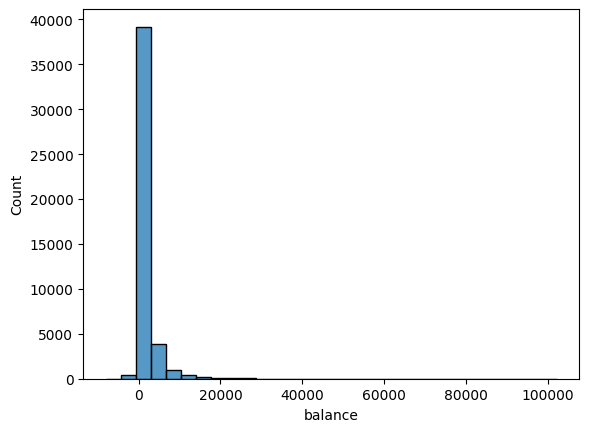

In [22]:
sns.histplot(data= df, x= 'balance', bins= 30)
plt.show()

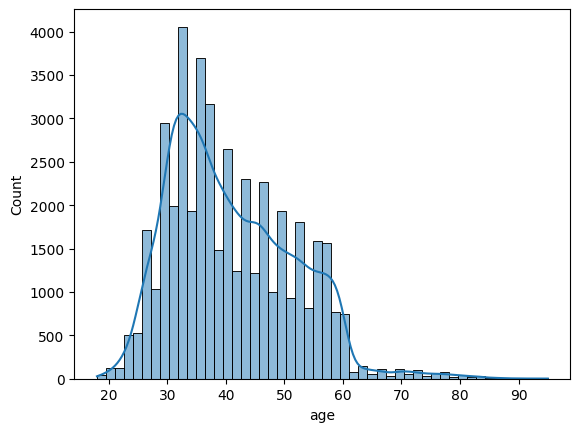

In [23]:
sns.histplot(data= df, x= 'age', bins= 50, kde= True)
plt.show()

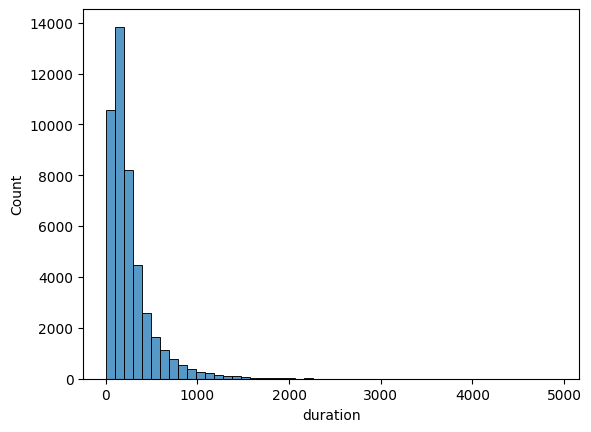

In [24]:
sns.histplot(data= df, x= 'duration', bins= 50)
plt.show()

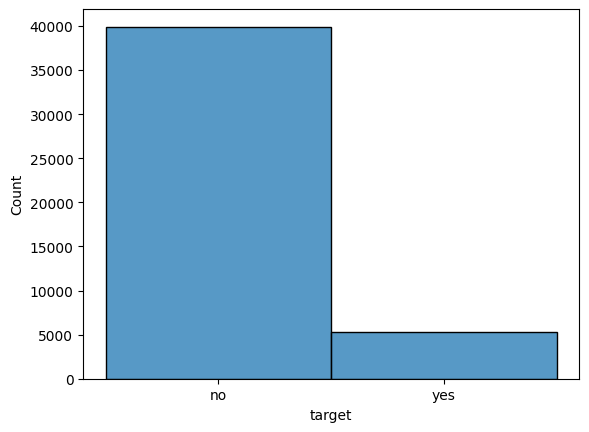

In [25]:
sns.histplot(data= df, x= 'target')
plt.show()

In [26]:
tdf = df.groupby(['job','target']).size().reset_index(name = 'Count')
tdf = tdf.sort_values(by= ['Count'], ascending= True)
tdf.head()

,job,target,Count
7,housemaid,yes,109
5,entrepreneur,yes,123
13,self-employed,yes,187
21,unemployed,yes,202
17,student,yes,269


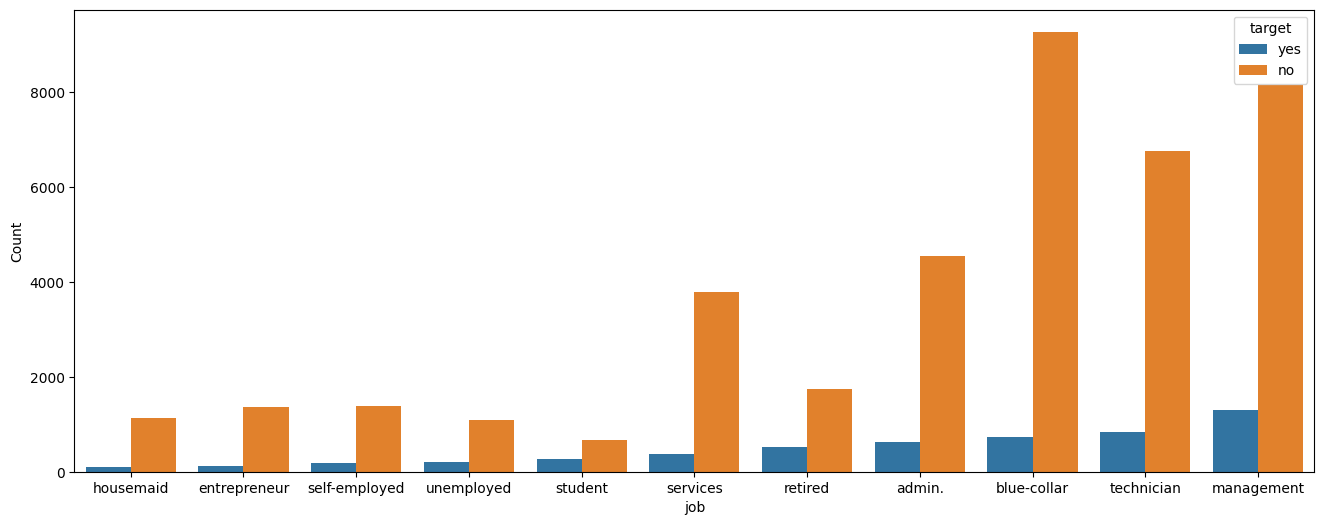

In [27]:
plt.figure(figsize=(16,6))
sns.barplot(data= tdf, x= 'job', y= 'Count',hue= 'target', errorbar= None)
plt.show()

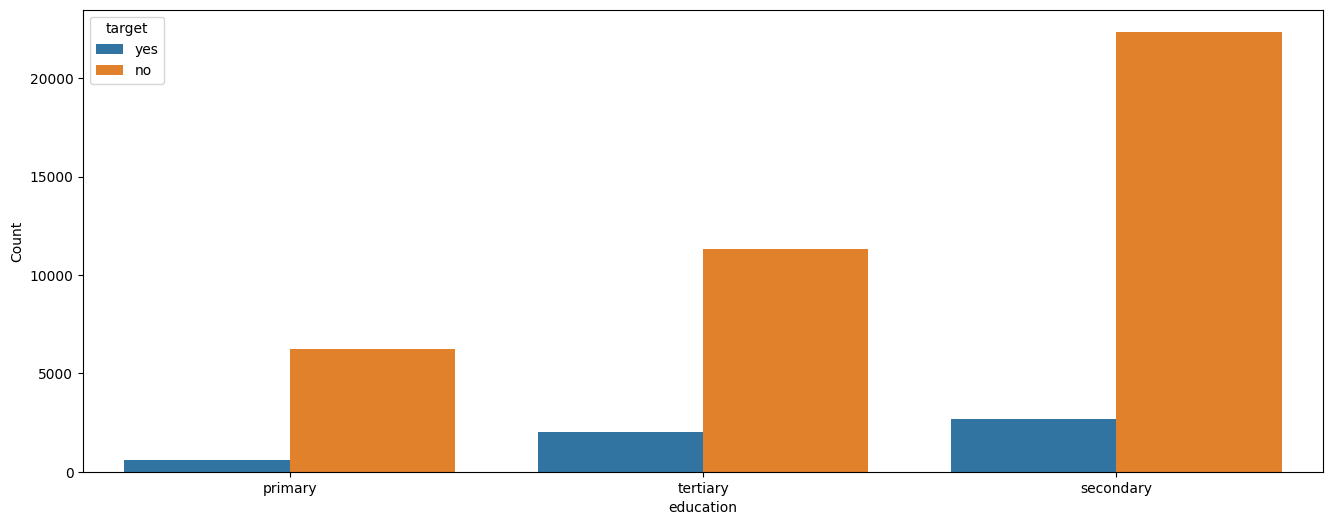

In [28]:
tdf = df.groupby(['education','target']).size().reset_index(name = 'Count')
tdf = tdf.sort_values(by= ['Count'], ascending= True)

plt.figure(figsize=(16,6))
sns.barplot(data= tdf, x= 'education', y= 'Count',hue= 'target', errorbar= None)
plt.show()

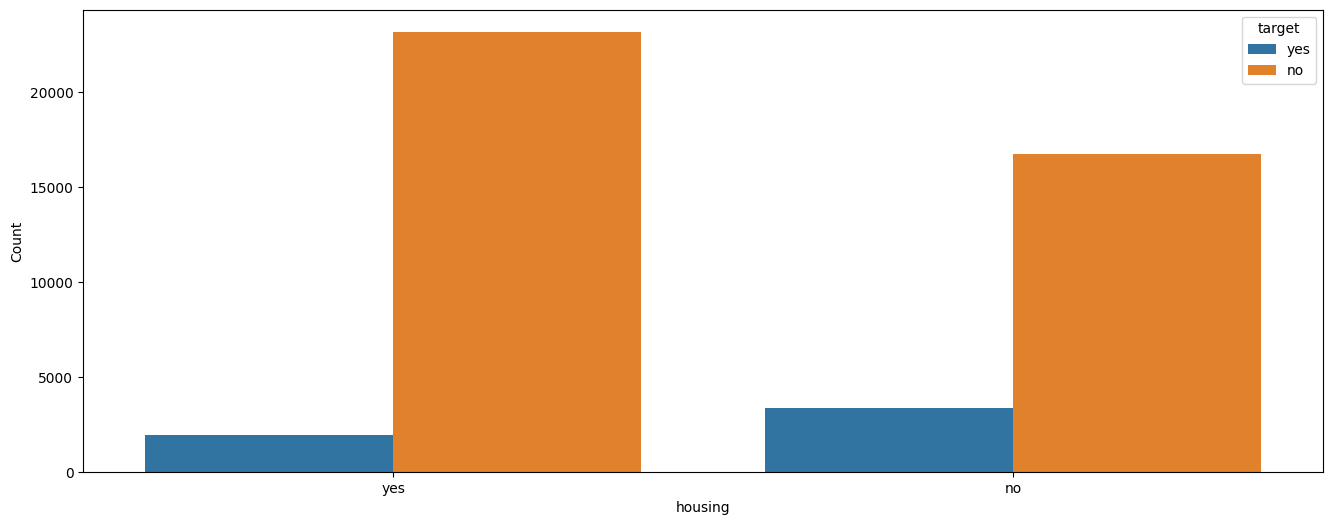

In [29]:
tdf = df.groupby(['housing','target']).size().reset_index(name = 'Count')
tdf = tdf.sort_values(by= ['Count'], ascending= True)

plt.figure(figsize=(16,6))
sns.barplot(data= tdf, x= 'housing', y= 'Count',hue= 'target', errorbar= None)
plt.show()

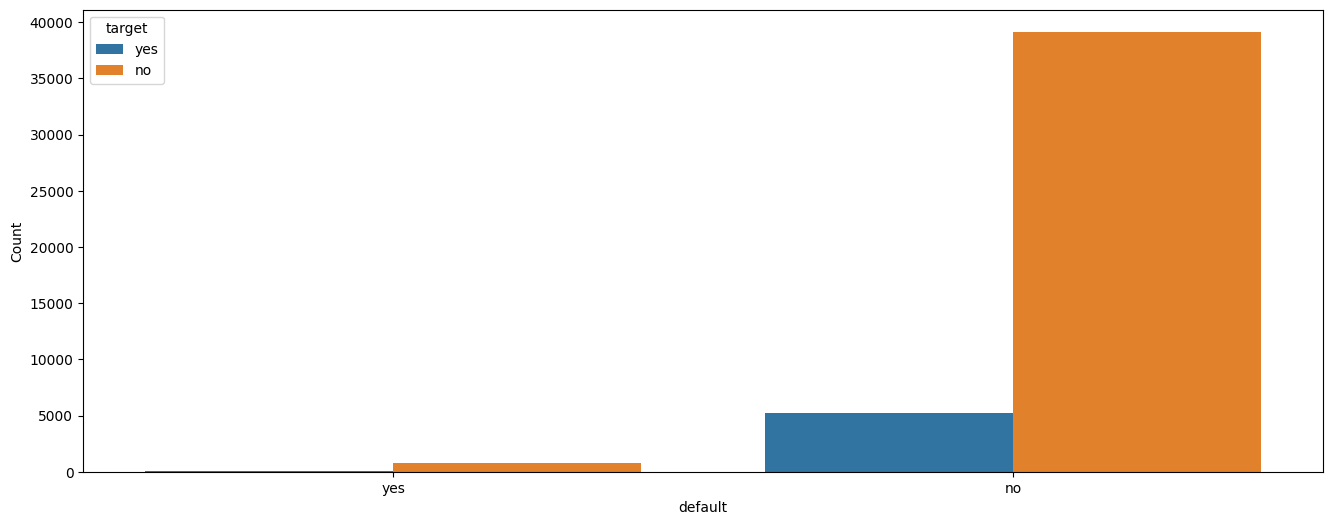

In [30]:
tdf = df.groupby(['default','target']).size().reset_index(name = 'Count')
tdf = tdf.sort_values(by= ['Count'], ascending= True)

plt.figure(figsize=(16,6))
sns.barplot(data= tdf, x= 'default', y= 'Count',hue= 'target', errorbar= None)
plt.show()

<Axes: xlabel='marital', ylabel='age'>

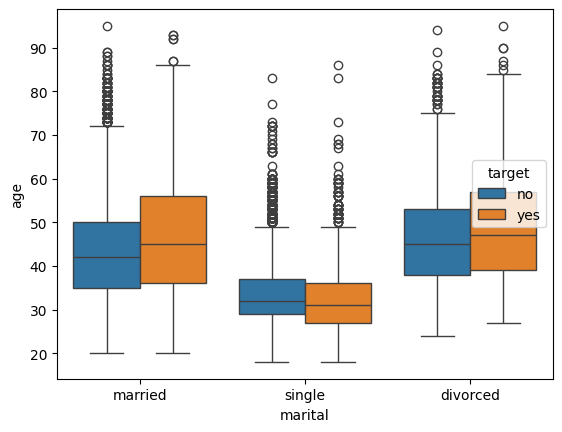

In [31]:
sns.boxplot(data= df, x= 'marital', y= 'age', hue= 'target')